## Supermarket Sales Analysis, Visualization & Prediction

Supermarket sales prediction and analysis is a crucial task in the retail industry to optimize inventory management, forecast demand, and improve overall customer experience. The objective of this machine learning project is to develop a model that accurately predicts future sales based on historical sales data and relevant features. The model will also provide insights and analysis into the factors affecting sales and help decision-makers make informed decisions to drive growth and increase profits.


#### Problem Statement:

Supermarkets are constantly facing the challenge of predicting sales and optimizing their inventory to meet the demand. The lack of accurate sales forecasting leads to overstocking or understocking, resulting in losses or shortage of popular items. The aim of this machine learning project is to develop a predictive model to analyze sales data of a big mart and accurately predict the future sales of each product.


#### Objective:

To develop a machine learning model that can predict the sales of a big mart.

To analyze the factors that influence the sales of a product and how they vary with time.

To identify the product categories with high demand and suggest recommendations to optimize inventory.


#### Data:

The data used in this project is a sales data of a big mart, including information on various attributes such as product categories, item weight, prices, and store location. The data is collected over a period of time and includes historical sales information and product information.


#### Methodology:

Data pre-processing: The data will be cleaned and transformed to prepare it for analysis.

Exploratory Data Analysis: The data will be explored to identify patterns, relationships, and trends.

Model development: A predictive model will be developed using various machine learning algorithms such as linear regression, decision tree, and random forest & then we will select best model with highest accuracy.

Model evaluation: The developed model will be evaluated based on accuracy.

Model deployment: The model will be deployed for sales prediction and analysis.


#### Expected Outcome:

The expected outcome of this project is a machine learning model that can accurately predict the sales of a big mart and provide insights into the factors that influence the sales of a product. This model will help the big mart optimize its inventory and improve its sales and profits

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import klib


In [2]:
data1=pd.read_csv('trainbig.csv')
data2=pd.read_csv('testbig.csv')

In [3]:
data1.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data2.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
data1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
data1['Item_Fat_Content']=data1['Item_Fat_Content'].replace(['LF','reg'],['Low Fat','Regular'])

In [9]:
data1['Item_Fat_Content']=data1['Item_Fat_Content'].replace(['low fat'],['Low Fat'])

In [10]:
data2['Item_Fat_Content']=data2['Item_Fat_Content'].replace(['LF','reg'],['Low Fat','Regular'])

In [11]:
data2['Item_Fat_Content']=data2['Item_Fat_Content'].replace(['low fat'],['Low Fat'])

In [12]:
data1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
data2['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

data1.drop('Item_Identifier',axis=1,inplace=True)

data2.drop('Item_Identifier',axis=1,inplace=True)

GridSpec(6, 6)

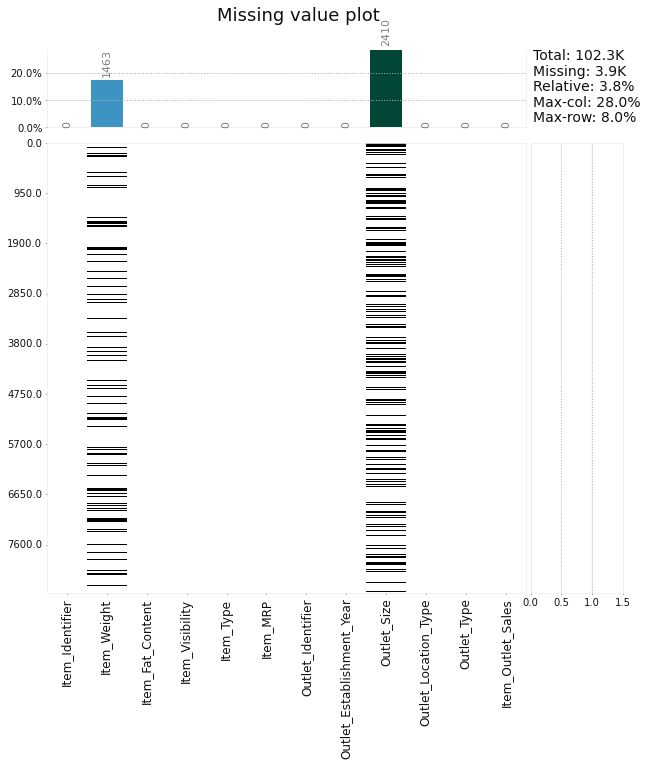

In [14]:
klib.missingval_plot(data1,figsize = (10, 10))

GridSpec(6, 6)

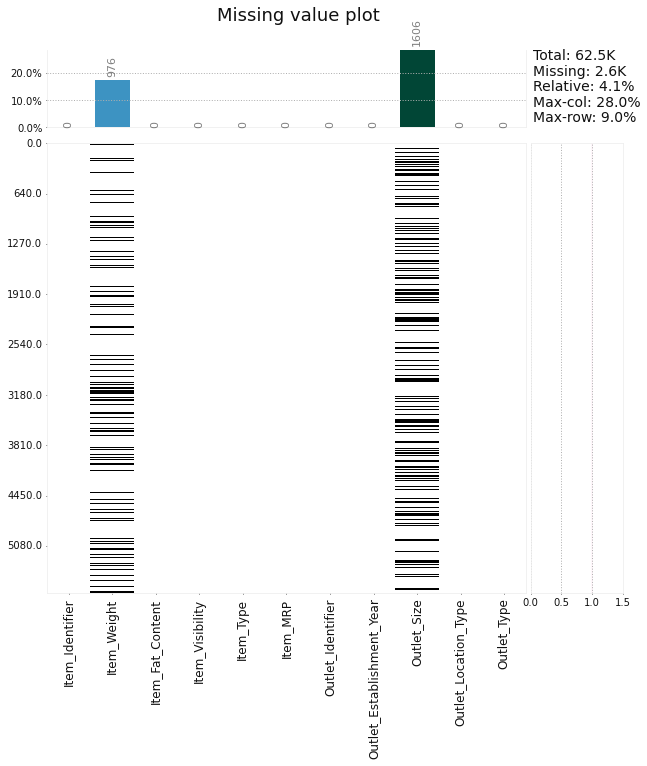

In [15]:
klib.missingval_plot(data2,figsize = (10, 10))

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
si=SimpleImputer(missing_values=np.nan,strategy='mean')

In [18]:
data1['Item_Weight']=si.fit_transform(data1[['Item_Weight']])

In [19]:
data2['Item_Weight']=si.fit_transform(data2[['Item_Weight']])

In [20]:
si1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [21]:
data1['Outlet_Size']=si1.fit_transform(data1[['Outlet_Size']])

In [22]:
data2['Outlet_Size']=si1.fit_transform(data2[['Outlet_Size']])

In [23]:
catcol1=data1.select_dtypes(object).columns
numcol1=data1.select_dtypes('number').columns

In [24]:
catcol2=data2.select_dtypes(object).columns
numcol2=data2.select_dtypes('number').columns

In [25]:
catcol1

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [26]:
numcol1

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

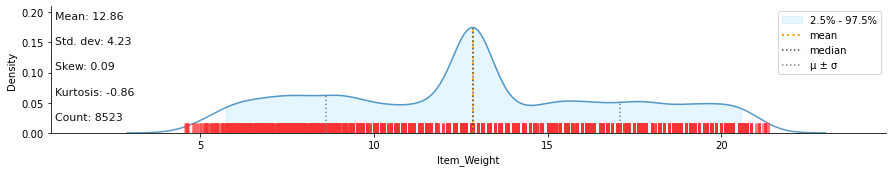

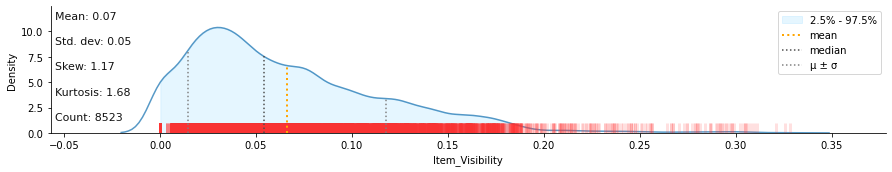

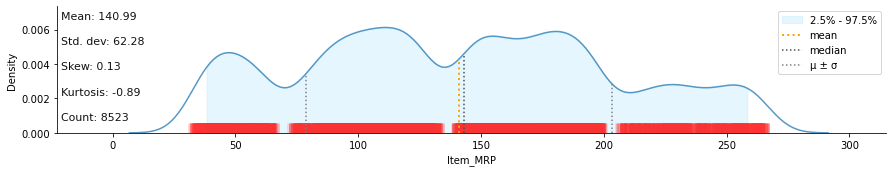

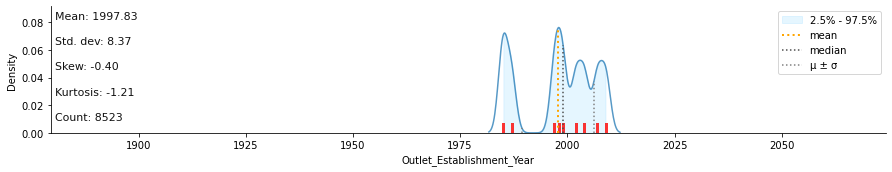

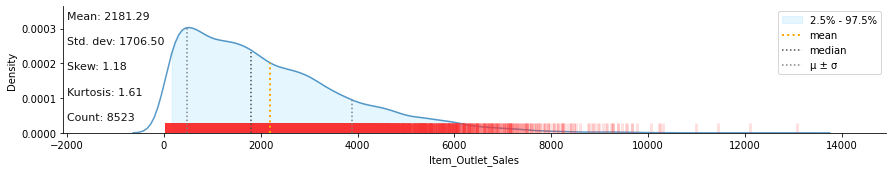

In [27]:
klib.dist_plot(data1,size = 2.5)
plt.show()

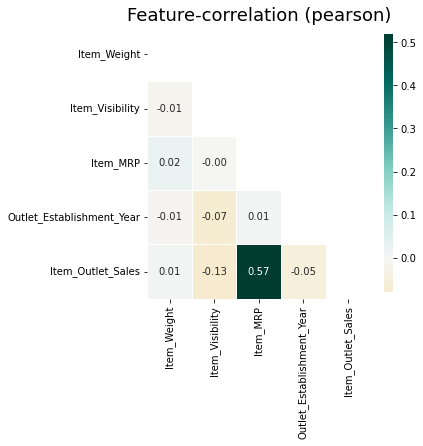

In [28]:
klib.corr_plot(data1,figsize = (5, 5))
plt.show()

In [29]:
klib.data_cleaning(data1)

Shape of cleaned data: (8523, 12) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.52 MB (-66.67%)



,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,FDX07,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,OUT010,1998,Medium,Tier 3,Grocery Store,732.380005
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.521805,OUT013,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.156998,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.133202,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.597656


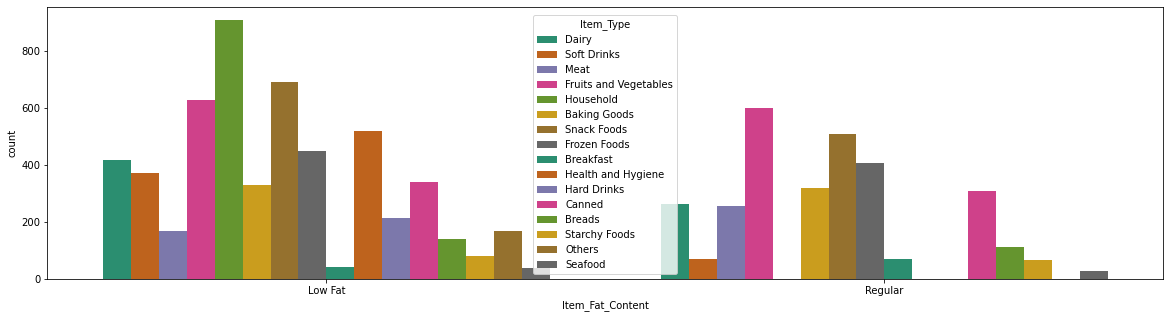

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(data1['Item_Fat_Content'],hue=data1['Item_Type'],palette='Dark2')
plt.show()

#### We can understand the demand of items according to thier fat content

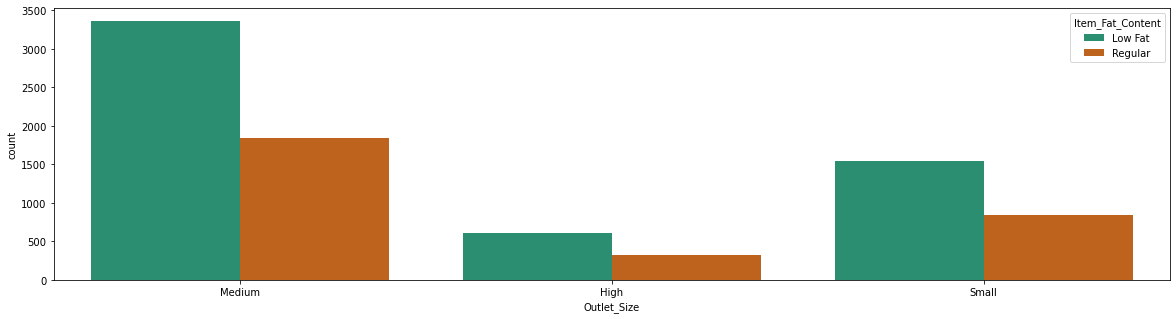

In [31]:
plt.figure(figsize=(20,5))
sns.countplot(data1['Outlet_Size'],hue=data1['Item_Fat_Content'],palette='Dark2')
plt.show()

#### From this graph we conclude that demand for items with low fat content is higher than the item with regular fat content

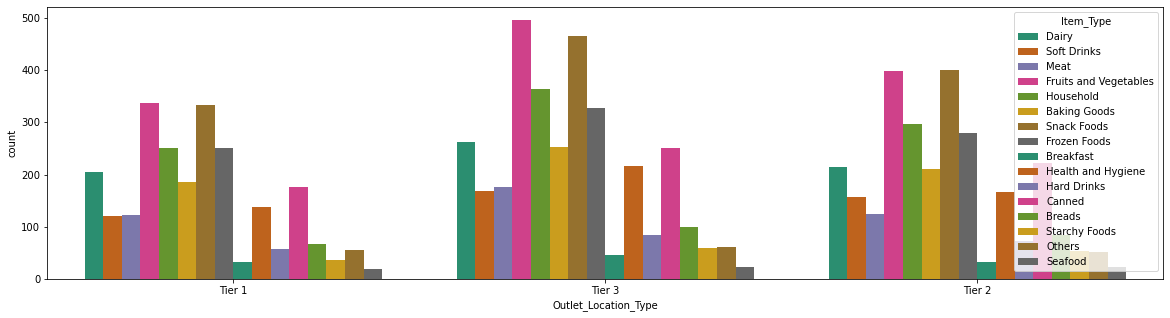

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(data1['Outlet_Location_Type'],hue=data1['Item_Type'],palette='Dark2')
plt.show()

#### this graph helps us in understanding the product demand with respect to location type as here we can clearlt see that product demand at Tier 3 location is higher than other location

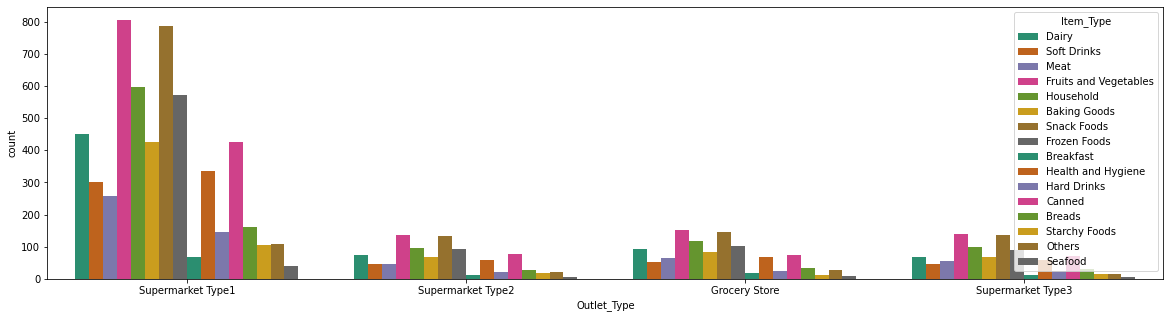

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(data1['Outlet_Type'],hue=data1['Item_Type'],palette='Dark2')
plt.show()

#### Now this graph shows us that  most of the items were sold in type 1 supermarket 

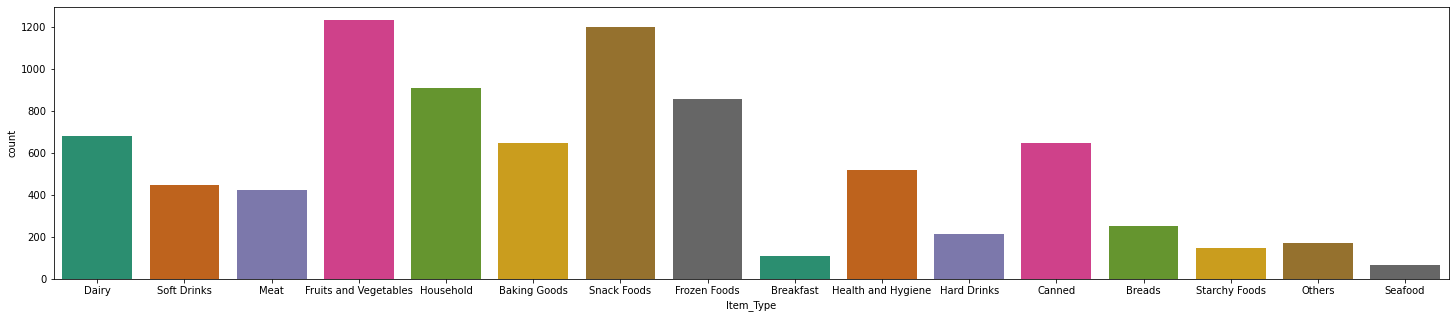

In [34]:
plt.figure(figsize=(25,5))
sns.countplot(data1['Item_Type'],palette='Dark2')
plt.show()

#### This graph helps us to understant the demand of each item types

In [35]:
out=data1.groupby(data1['Outlet_Identifier'])
out['Item_Outlet_Sales'].sum()

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

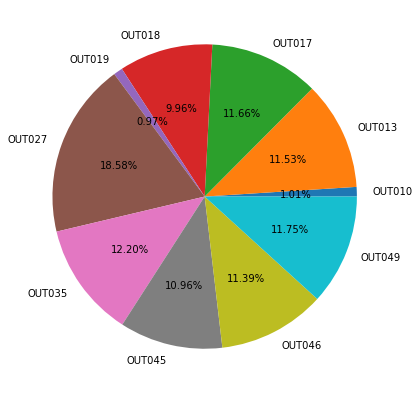

In [36]:
plt.figure(figsize=(7,7))
plt.pie(out['Item_Outlet_Sales'].sum(),autopct='%0.2f%%',labels =['OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049'])
plt.show()

#### Above pie chart gives us the exact analysis of sales made from each outlet

In [37]:
list=data1['Item_Type'].unique().tolist()
list.sort()
print(list)


['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']


In [38]:
product=data1.groupby(data1['Item_Type'])
product['Item_Type'].value_counts()


Item_Type              Item_Type            
Baking Goods           Baking Goods              648
Breads                 Breads                    251
Breakfast              Breakfast                 110
Canned                 Canned                    649
Dairy                  Dairy                     682
Frozen Foods           Frozen Foods              856
Fruits and Vegetables  Fruits and Vegetables    1232
Hard Drinks            Hard Drinks               214
Health and Hygiene     Health and Hygiene        520
Household              Household                 910
Meat                   Meat                      425
Others                 Others                    169
Seafood                Seafood                    64
Snack Foods            Snack Foods              1200
Soft Drinks            Soft Drinks               445
Starchy Foods          Starchy Foods             148
Name: Item_Type, dtype: int64

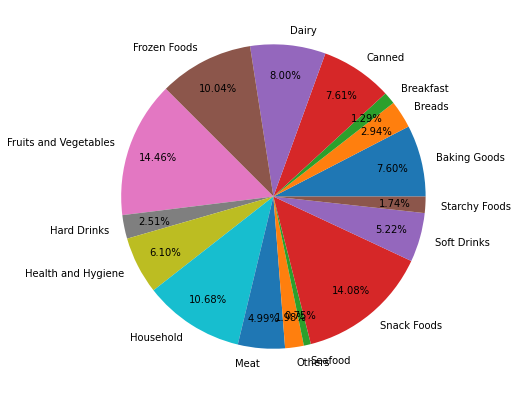

In [39]:
plt.figure(figsize=(7,7))
plt.pie(product['Item_Type'].value_counts(),autopct='%0.2f%%',labels =list,pctdistance=0.8)
plt.show()

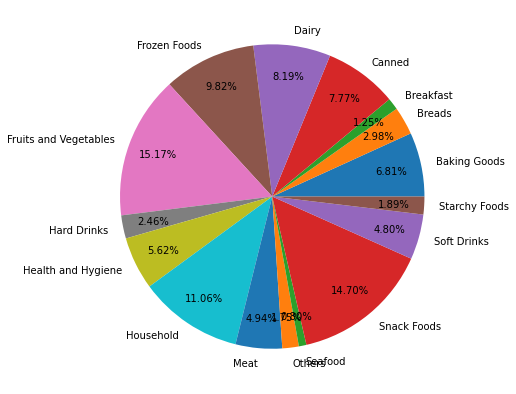

In [40]:
plt.figure(figsize=(7,7))
plt.pie(product['Item_Outlet_Sales'].sum(),autopct='%0.2f%%',labels =list,pctdistance=0.8)
plt.show()

#### Above two pie chart gives us information about product demand and overall sales made from them

In [41]:
data1.loc[((data1['Outlet_Identifier']=='OUT035'))]['Item_Type'].value_counts()

Snack Foods              140
Fruits and Vegetables    129
Household                102
Frozen Foods              92
Canned                    79
Dairy                     71
Baking Goods              68
Soft Drinks               52
Health and Hygiene        50
Meat                      43
Breads                    29
Hard Drinks               22
Starchy Foods             19
Others                    16
Breakfast                 10
Seafood                    8
Name: Item_Type, dtype: int64

In [42]:
az=data1['Outlet_Identifier'].unique().tolist()
az

['OUT049',
 'OUT018',
 'OUT010',
 'OUT013',
 'OUT027',
 'OUT045',
 'OUT017',
 'OUT046',
 'OUT035',
 'OUT019']

In [43]:
labels=data1

In [44]:
dz=data1['Outlet_Establishment_Year'].unique().tolist()
dz

[1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004]

In [45]:
for i in dz:
    abc=data1.loc[((data1['Outlet_Establishment_Year']==i))]['Outlet_Identifier'].unique()
    print(f'{i} -> {abc}')

1999 -> ['OUT049']
2009 -> ['OUT018']
1998 -> ['OUT010']
1987 -> ['OUT013']
1985 -> ['OUT027' 'OUT019']
2002 -> ['OUT045']
2007 -> ['OUT017']
1997 -> ['OUT046']
2004 -> ['OUT035']


In [46]:
for i in az:
        abcd=data1.loc[((data1['Outlet_Identifier']==i))]['Item_Outlet_Sales'].sum()
        print(f'{i} -> {abcd}')

OUT049 -> 2183969.8102
OUT018 -> 1851822.83
OUT010 -> 188340.17239999998
OUT013 -> 2142663.5782000003
OUT027 -> 3453926.0514
OUT045 -> 2036725.477
OUT017 -> 2167465.294
OUT046 -> 2118395.1682
OUT035 -> 2268122.9354
OUT019 -> 179694.09360000002


In [47]:
l3={}
l2=[]
for i in dz:
    l1=data1.loc[((data1['Outlet_Establishment_Year']==i))]['Item_Outlet_Sales'].sum()
    l2.append(l1)
    
l31=pd.DataFrame(l2,index=dz)
l31



,0
1999,2.183970e+06
2009,1.851823e+06
1998,1.883402e+05
1987,2.142664e+06
1985,3.633620e+06
2002,2.036725e+06
2007,2.167465e+06
1997,2.118395e+06
2004,2.268123e+06


                 0
1999  2.183970e+06
2009  1.851823e+06
1998  1.883402e+05
1987  2.142664e+06
1985  3.633620e+06
2002  2.036725e+06
2007  2.167465e+06
1997  2.118395e+06
2004  2.268123e+06


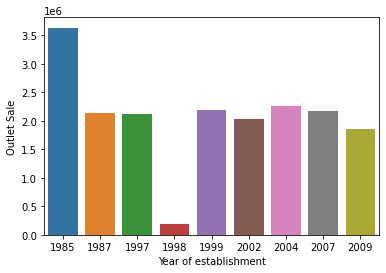

In [48]:
print(l31)
sns.barplot(data=l31,x=l31.index,y=l31[0])
plt.ylabel('Outlet Sale')
plt.xlabel('Year of establishment')
plt.show()

#### Outlet 10 & 19 are grocery store hence they have low sales and while out 27 is situated in tier 3 city location it has more footfall hence it produces more sales than others

Pie chart below gives us representation of product demand from each outlet
outlet OUT049 product demand


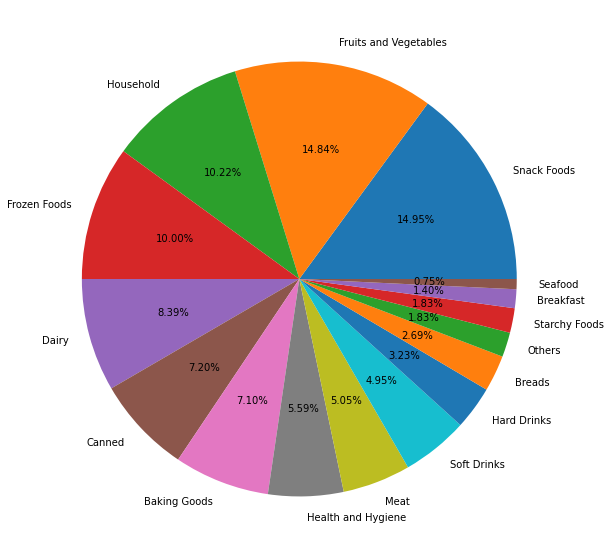

outlet OUT018 product demand


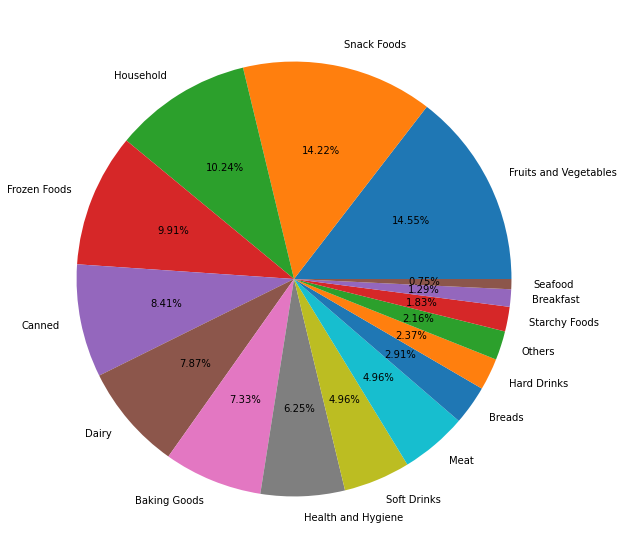

outlet OUT010 product demand


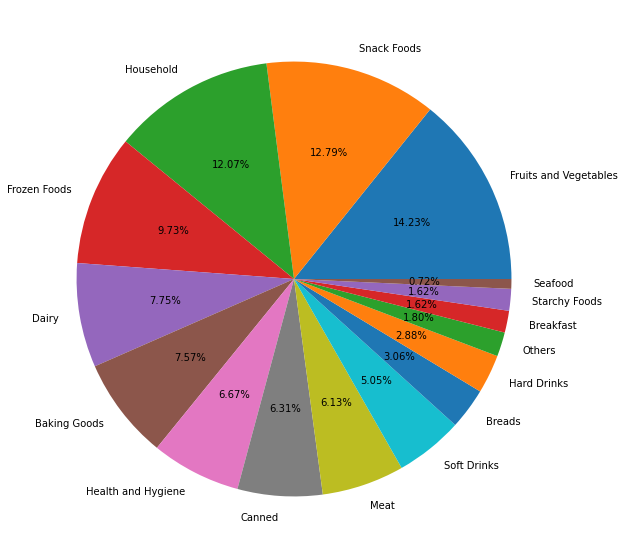

outlet OUT013 product demand


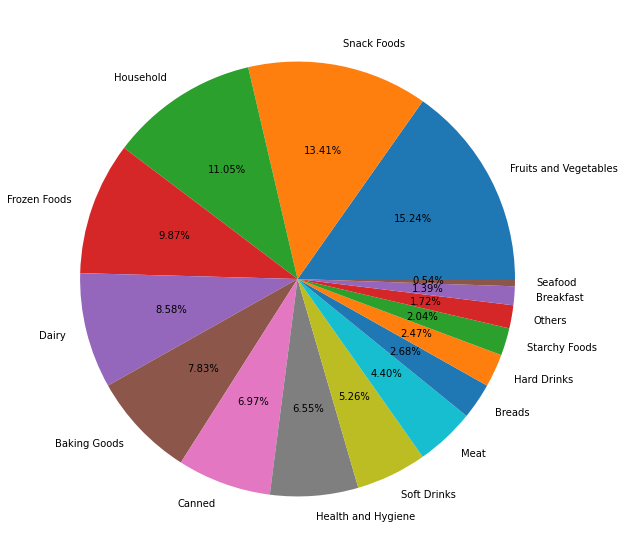

outlet OUT027 product demand


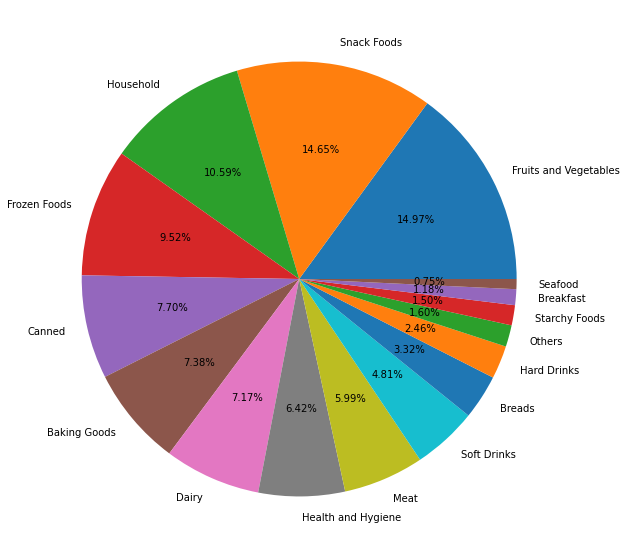

outlet OUT045 product demand


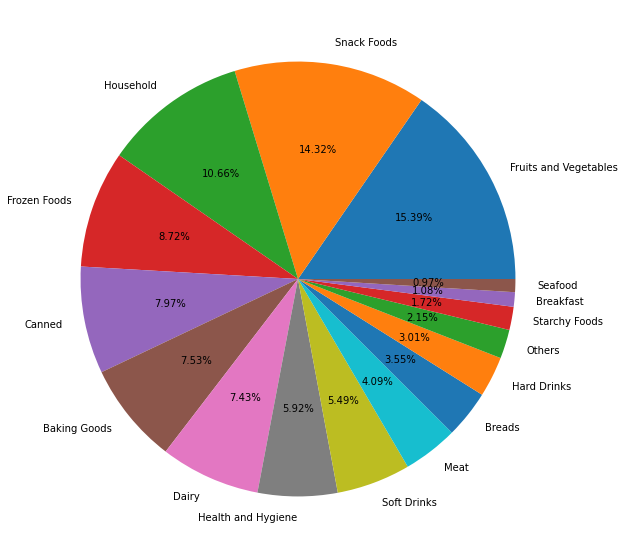

outlet OUT017 product demand


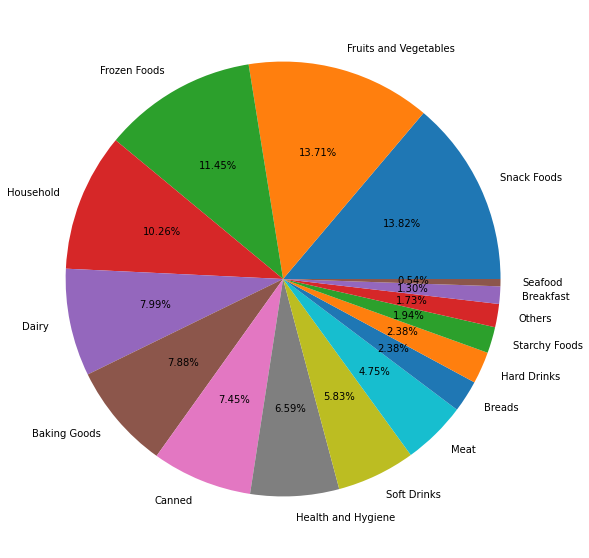

outlet OUT046 product demand


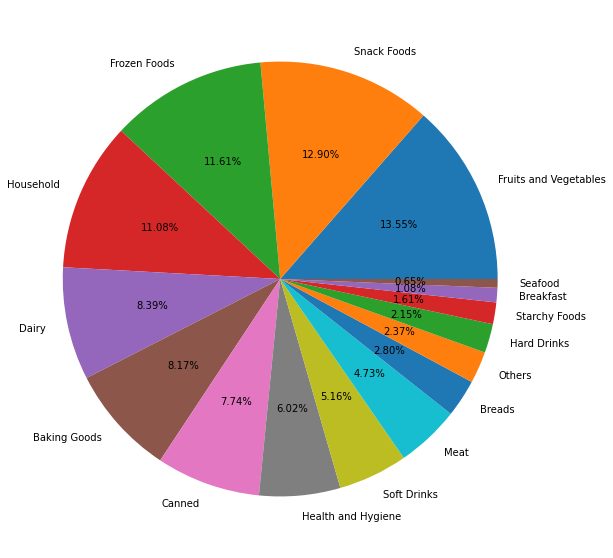

outlet OUT035 product demand


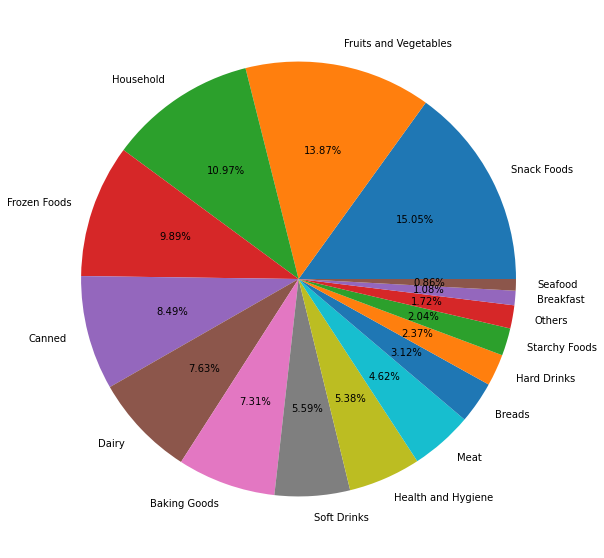

outlet OUT019 product demand


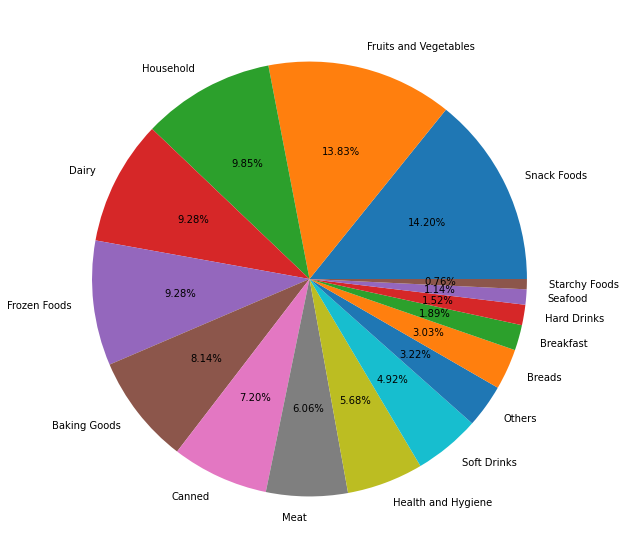

In [49]:
print('Pie chart below gives us representation of product demand from each outlet')
for i in az:
    print(f'outlet {i} product demand')
    plt.figure(figsize=(10,10))
    plt.pie((data1.loc[((data1['Outlet_Identifier']==i))]['Item_Type'].value_counts()),autopct='%0.2f%%',labels=data1.loc[((data1['Outlet_Identifier']==i))]['Item_Type'].value_counts().index)
    plt.show()

In [50]:
bz=data1['Outlet_Location_Type'].unique().tolist()
bz

['Tier 1', 'Tier 3', 'Tier 2']

Pie chart below gives us representation of product demand from each location type
location type Tier 1 and product demand


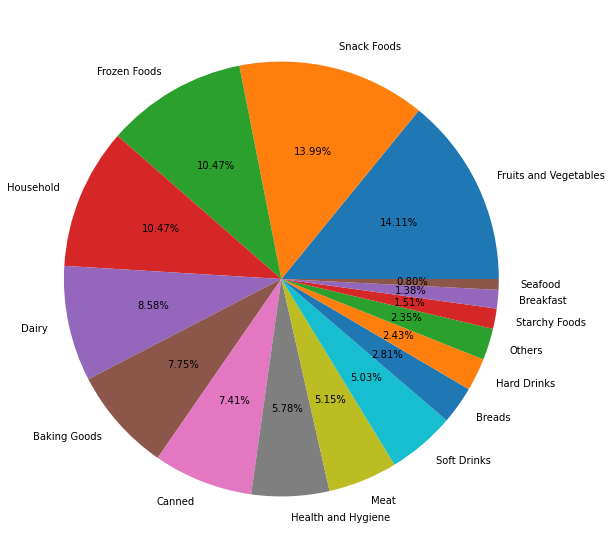

location type Tier 3 and product demand


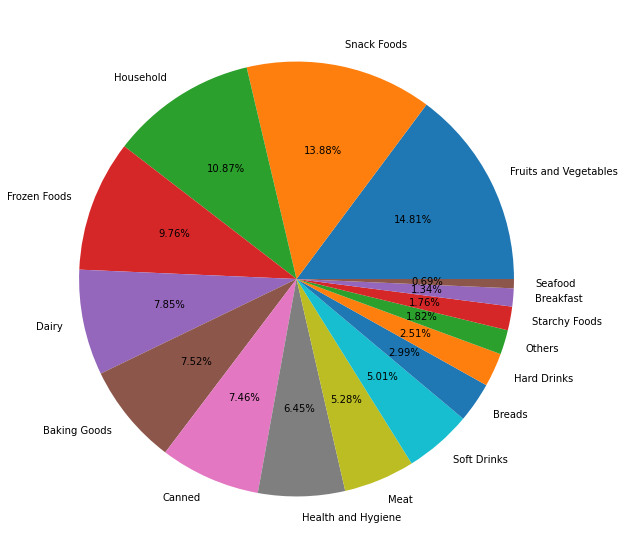

location type Tier 2 and product demand


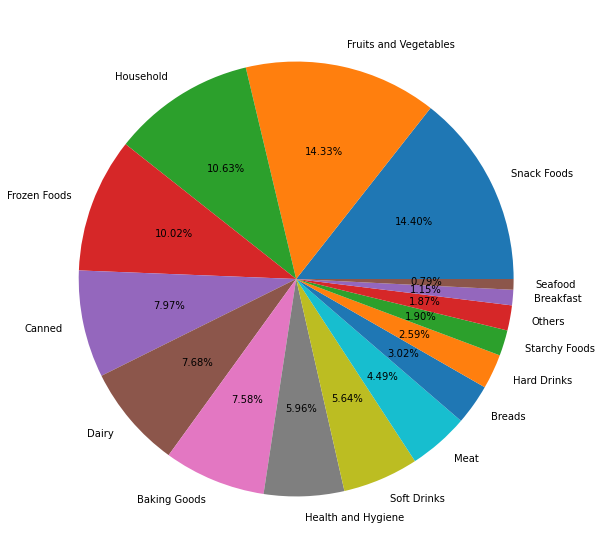

In [51]:
print('Pie chart below gives us representation of product demand from each location type')
for i in bz:
    print(f'location type {i} and product demand')
    plt.figure(figsize=(10,10))
    plt.pie((data1.loc[((data1['Outlet_Location_Type']==i))]['Item_Type'].value_counts()),autopct='%0.2f%%',labels=data1.loc[((data1['Outlet_Location_Type']==i))]['Item_Type'].value_counts().index)
    plt.show()

In [52]:
cz=data1['Outlet_Size'].unique().tolist()
cz

['Medium', 'High', 'Small']

Pie chart below gives us representation of product demand with respect to outlet size
outlet size Medium and product demand


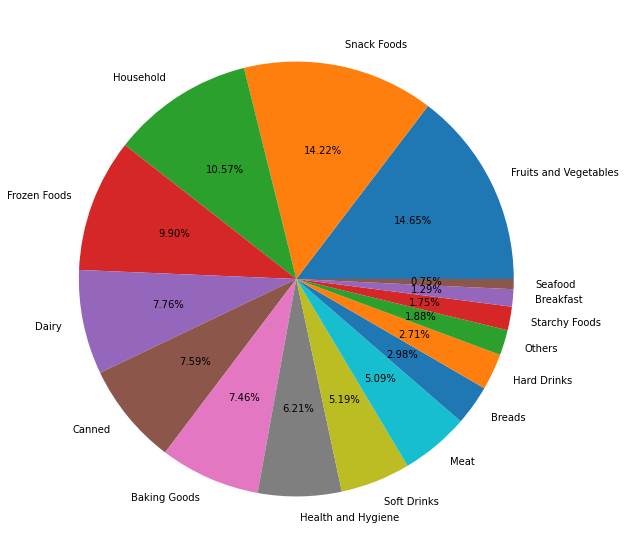

outlet size High and product demand


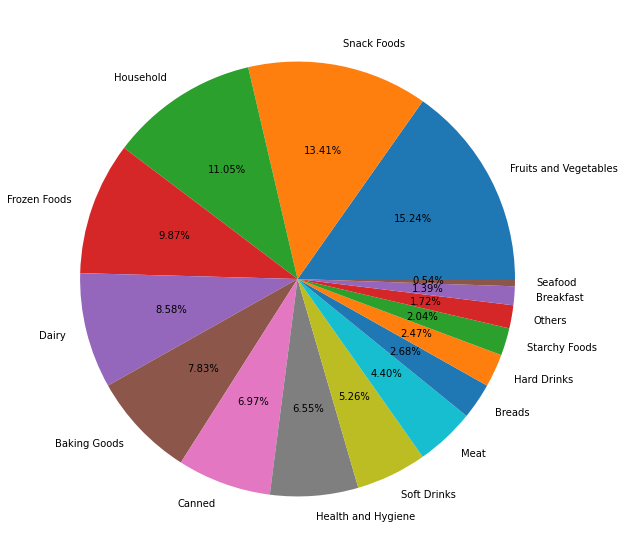

outlet size Small and product demand


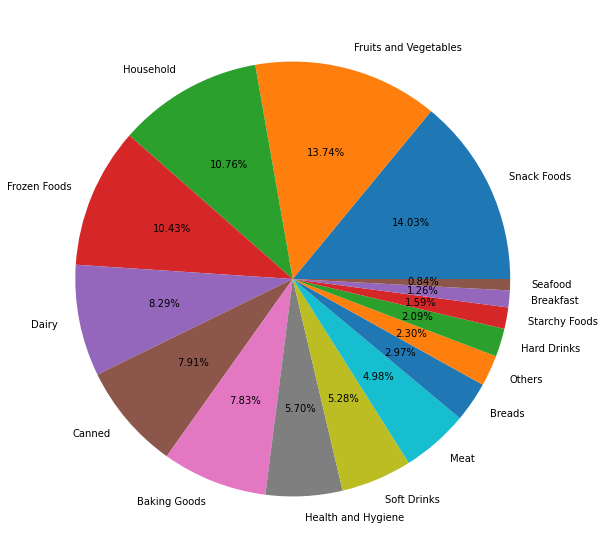

In [53]:
print('Pie chart below gives us representation of product demand with respect to outlet size')
for i in cz:
    print(f'outlet size {i} and product demand')
    plt.figure(figsize=(10,10))
    plt.pie((data1.loc[((data1['Outlet_Size']==i))]['Item_Type'].value_counts()),autopct='%0.2f%%',labels=data1.loc[((data1['Outlet_Size']==i))]['Item_Type'].value_counts().index)
    plt.show()

In [54]:
from sklearn.preprocessing import OrdinalEncoder

In [55]:
oe=OrdinalEncoder()

In [56]:
data1[catcol1]=oe.fit_transform(data1[catcol1])

In [57]:
data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [58]:
x=data1.iloc[:,:-1]
y=data1.iloc[:,-1]

In [59]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler()
x.iloc[:,:]=rc.fit_transform(x.iloc[:,:])

In [60]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.812703,-0.531786,0.0,-0.560443,-0.333333,1.163142,0.8,0.000000,0.0,-0.5,0.0
1,-1.004537,-1.037017,1.0,-0.512646,1.333333,-1.031872,-0.4,0.588235,0.0,0.5,1.0
2,-0.156837,0.693924,0.0,-0.549899,0.666667,-0.015191,0.8,0.000000,0.0,-0.5,0.0
3,0.438108,0.948035,1.0,-0.797844,0.000000,0.425652,-1.0,-0.058824,0.0,0.5,-1.0
4,0.666235,-0.587092,0.0,-0.797844,0.500000,-0.970966,-0.8,-0.705882,-1.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.535321,-0.895762,0.0,0.042199,1.166667,0.778819,-0.8,-0.705882,-1.0,0.5,0.0
8519,0.147764,-0.669304,1.0,-0.102795,-1.000000,-0.379622,0.4,0.176471,0.0,0.0,0.0
8520,0.744005,-0.337466,0.0,-0.277305,0.333333,-0.630496,0.2,0.294118,1.0,0.0,0.0
8521,-0.132210,-0.844192,1.0,1.350523,1.166667,-0.434337,-0.4,0.588235,0.0,0.5,1.0


<AxesSubplot:>

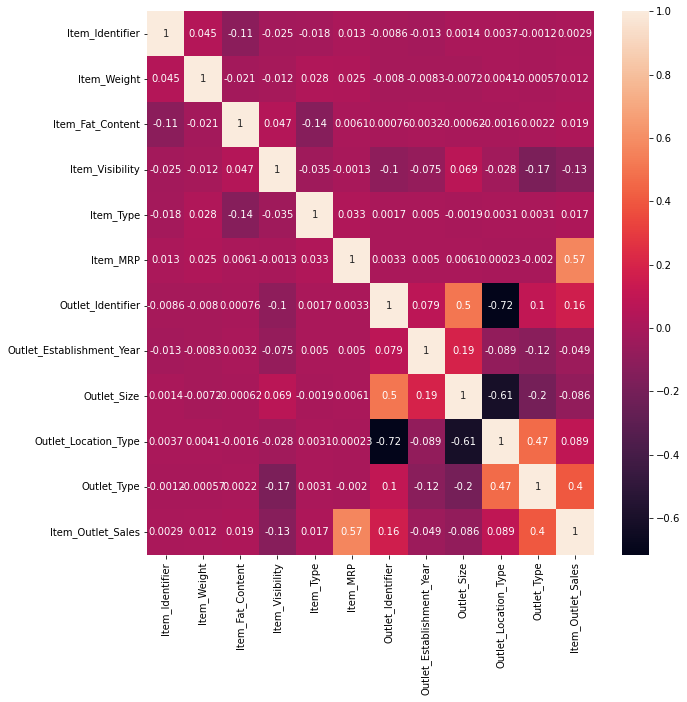

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),annot=True)

### Traininng our model on machine learning algorith

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [65]:
import evalml

In [66]:
X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(x,y,problem_type='regression')

In [67]:
from evalml.automl import AutoMLSearch
automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='regression',max_iterations=20)
automl.search()

{1: {'Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + Standard Scaler': '00:00',
  'Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer': '00:01',
  'Total time of batch': '00:02'},
 2: {'Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + Standard Scaler + RF Regressor Select From Model': '00:01',
  'Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer + RF Regressor Select From Model': '00:01',
  'Total time of batch': '00:03'},
 3: {'Decision Tree Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'Extra Trees Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'XGBoost Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'CatBoost Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'LightGBM Regressor w/ Replace

In [68]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,Extra Trees Regressor w/ Replace Nullable Type...,6,0.603145,0.603145,0.009853,410165.182838,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,4,Random Forest Regressor w/ Replace Nullable Ty...,4,0.599380,0.599380,0.011985,407605.305587,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,2,Random Forest Regressor w/ Replace Nullable Ty...,2,0.599108,0.599108,0.012318,407420.739997,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,15,LightGBM Regressor w/ Replace Nullable Types T...,15,0.593478,0.593478,0.011553,403592.805769,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,11,Random Forest Regressor w/ Replace Nullable Ty...,11,0.589495,0.589495,0.010420,400885.188665,False,{'Imputer': {'categorical_impute_strategy': 'm...
9,5,Decision Tree Regressor w/ Replace Nullable Ty...,5,0.582514,0.582514,0.017033,396138.974617,False,{'Imputer': {'categorical_impute_strategy': 'm...
10,7,XGBoost Regressor w/ Replace Nullable Types Tr...,7,0.573471,0.573471,0.000957,389990.462046,False,{'Imputer': {'categorical_impute_strategy': 'm...
15,1,Elastic Net Regressor w/ Replace Nullable Type...,1,0.507286,0.507286,0.011828,344992.594677,False,{'Imputer': {'categorical_impute_strategy': 'm...
17,3,Elastic Net Regressor w/ Replace Nullable Type...,3,0.485888,0.485888,0.008175,330444.768798,False,{'Imputer': {'categorical_impute_strategy': 'm...
18,8,CatBoost Regressor w/ Replace Nullable Types T...,8,0.252122,0.252122,0.006645,171512.501421,False,{'Imputer': {'categorical_impute_strategy': 'm...


In [69]:
automl.best_pipeline

pipeline = RegressionPipeline(component_graph={'Replace Nullable Types Transformer': ['Replace Nullable Types Transformer', 'X', 'y'], 'Imputer': ['Imputer', 'Replace Nullable Types Transformer.x', 'Replace Nullable Types Transformer.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Replace Nullable Types Transformer.y'], 'Extra Trees Regressor': ['Extra Trees Regressor', 'Select Columns Transformer.x', 'Replace Nullable Types Transformer.y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Type']}, 'Extra Trees Regressor':{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fractio

In [70]:
print(automl.describe_pipeline(automl.rankings.iloc[0]['id']))


******************************************************************************************************
* Extra Trees Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer *
******************************************************************************************************

Problem Type: regression
Model Family: Extra Trees

Pipeline Steps
1. Replace Nullable Types Transformer
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. Select Columns Transformer
	 * columns : ['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Type']
4. Extra Trees Regressor
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for regressi

In [71]:
from sklearn.ensemble import ExtraTreesRegressor

In [72]:
etr=ExtraTreesRegressor(n_estimators = 100,max_depth = 6,min_samples_split = 2,min_weight_fraction_leaf = 0.0,n_jobs = -1)


In [73]:
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)
print(f'mae = {mean_absolute_error(y_test,y_pred)}')
print(f'mse = {mean_squared_error(y_test,y_pred)}')
print(f'rmse = {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'r2 = {r2_score(y_test,y_pred)}')

mae = 767.7185042608345
mse = 1175372.650948541
rmse = 1084.1460468721643
r2 = 0.5984184857914876


### Predicting the sales for our test data set

In [74]:
oe=OrdinalEncoder()
data2[catcol2]=oe.fit_transform(data2[catcol2])

In [75]:
new_data2=rc.transform(data2)

In [76]:
Item_Outlet_Sales=etr.predict(new_data2)

In [77]:
Item_Outlet_Sales

array([1759.57239101, 1468.24234402,  617.5103022 , ..., 1940.55516075,
       3580.4604437 , 1337.01991682])

In [78]:
data2['Item_Outlet_Sales']=Item_Outlet_Sales

In [79]:
data2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103.0,20.750000,0.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0,1759.572391
1,1067.0,8.300000,1.0,0.038428,4.0,87.3198,2.0,2007,1.0,1.0,1.0,1468.242344
2,1406.0,14.600000,0.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0,617.510302
3,809.0,7.315000,0.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0,2451.971295
4,1184.0,12.695633,1.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0,6263.298948
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,1.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0,2250.486578
5677,306.0,7.600000,1.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0,2595.681963
5678,1412.0,10.000000,0.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0,1940.555161
5679,517.0,15.300000,1.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0,3580.460444
